### Data Exploration

In [7]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

data_path = r"C:\Users\vinay\OneDrive\Desktop\My_Centennial\Winter_2023_4th_Sem\COM_262_NLP\Project\Office_Products_5.json.gz"
df = getDF(data_path)

#df = getDF('/content/drive/MyDrive/Centennial/NLP/Office_Products_5.json.gz')

In [8]:
df

overall  verified   reviewTime      reviewerID        asin  \
0           4.0      True   11 7, 2017  A2NIJTYWADLK57  0140503528   
1           4.0      True   03 7, 2017  A2827D8EEURMP4  0140503528   
2           5.0      True  06 25, 2016   APB6087F4J09J  0140503528   
3           5.0      True  02 21, 2016  A2DHERRZIPFU7X  0140503528   
4           5.0     False   08 2, 2015   A2XCLJRGFANRC  0140503528   
...         ...       ...          ...             ...         ...   
800352      5.0      True   09 9, 2017   ACHG5QICJCS1F  B01HHLLLIO   
800353      5.0      True   06 2, 2017  A1YB5J8SF6QX3L  B01HHLLLIO   
800354      5.0      True  04 29, 2017  A3N4O7L4HBYJX4  B01HHLLLIO   
800355      5.0      True  02 21, 2017  A2DR3CXSWWLYXY  B01HHLLLIO   
800356      4.0      True  01 27, 2018  A3824BGRMFVT05  B01HINS07G   

                              style       reviewerName  \
0        {'Format:': ' Board book'}        cotton clay   
1         {'Format:': ' Hardcover'}           emankcin   
2        {'Format:': ' Board book'}      Starbucks Fan   
3         {'Format:': ' Paperback'}   Caitlyn Jacobson   
4         {'Format:': ' Hardcover'}           E. Ervin   
...                             ...                ...   
800352        {'Size:': ' 6 Rolls'}               Anky   
800353        {'Size:': ' 6 Rolls'}                 DM   
800354        {'Size:': ' 6 Rolls'}  Verdant Treasures   
800355        {'Size:': ' 6 Rolls'}              C. F.   
800356  {'Style:': ' with Erasers'}     Tegan M. Reyes   

                                               reviewText  \
0       kids like story BUT while i really wanted a bo...   
1       Bought this used and it came in great conditio...   
2       Every story and book about Corduroy is Fantast...   
3       I purchased this book for my first grade class...   
4       Having spent numerous years in an elementary s...   
...                                                   ...   
800352              Delivered on time and is as expected.   
800353                                      worked great.   
800354  I used to score free UPS 4x6 labels.  The blac...   
800355                                              great   
800356  Struggled finding a sharpener and they didn't ...   

                                      summary  unixReviewTime vote image  
0          good story, small size book though      1510012800  NaN   NaN  
1                                        Good      1488844800  NaN   NaN  
2                 Best Books for All Children      1466812800  NaN   NaN  
3                             Great for Math!      1456012800  NaN   NaN  
4                               Love Corduroy      1438473600  NaN   NaN  
...                                       ...             ...  ...   ...  
800352                                5 stars      1504915200  NaN   NaN  
800353                             good stuff      1496361600  NaN   NaN  
800354  Couldn't be happier with these labels      1493424000  NaN   NaN  
800355                             Five Stars      1487635200  NaN   NaN  
800356                             Four Stars      1517011200  NaN   NaN  

[800357 rows x 12 columns]

This Dataset is an updated version of the Amazon review dataset released in 2014. As in the previous version, this dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs). In addition, this version provides the following features:

More reviews:
The total number of reviews is 233.1 million (142.8 million in 2014).
Newer reviews:
Current data includes reviews in the range May 1996 - Oct 2018.
Metadata:
We have added transaction metadata for each review shown on the review page. Such information includes:
Product information, e.g. color (white or black), size (large or small), package type (hardcover or electronics), etc.
Product images that are taken after the user received the product.
Added more detailed metadata of the product landing page. Such detailed information includes:
Bullet-point descriptions under product title.
Technical details table (attribute-value pairs).
Similar products table.
More categories:
Includes 5 new product categories.

Source: https://nijianmo.github.io/amazon/index.html#code

In [9]:
df.shape

(800357, 12)

In [10]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [11]:
counts_of_reviews_per_product = df.groupby('asin').size()
for product, count_of_reviews_per_product in counts_of_reviews_per_product.iteritems():
  print(f'{product} has {count_of_reviews_per_product} reviews')
# counts_of_reviews_per_product

0140503528 has 11 reviews
0310432065 has 15 reviews
0310520347 has 22 reviews
0310802636 has 19 reviews
0310806607 has 16 reviews
0310806615 has 8 reviews
0310818605 has 7 reviews
0310818621 has 9 reviews
0310821800 has 22 reviews
0310823706 has 15 reviews
0312385331 has 6 reviews
0439394058 has 9 reviews
0439499887 has 83 reviews
0439505399 has 5 reviews
0439506042 has 5 reviews
0439509769 has 7 reviews
0439654939 has 7 reviews
0439731593 has 9 reviews
0439731771 has 10 reviews
0439784395 has 8 reviews
0439893577 has 29 reviews
0486256006 has 16 reviews
0486413012 has 43 reviews
0528002279 has 30 reviews
0528002287 has 33 reviews
0528847112 has 36 reviews
0528847120 has 8 reviews
052895993X has 9 reviews
0528959948 has 30 reviews
0528960911 has 18 reviews
0545040116 has 9 reviews
0545114780 has 27 reviews
0545114799 has 6 reviews
0545114802 has 6 reviews
0545114829 has 24 reviews
0545114985 has 22 reviews
0545115000 has 19 reviews
0545118239 has 5 reviews
0545196418 has 5 reviews
0545

C:\Users\vinay\AppData\Local\Temp\ipykernel_2024\2754102410.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for product, count_of_reviews_per_product in counts_of_reviews_per_product.iteritems():


In [12]:
len(counts_of_reviews_per_product)

27965

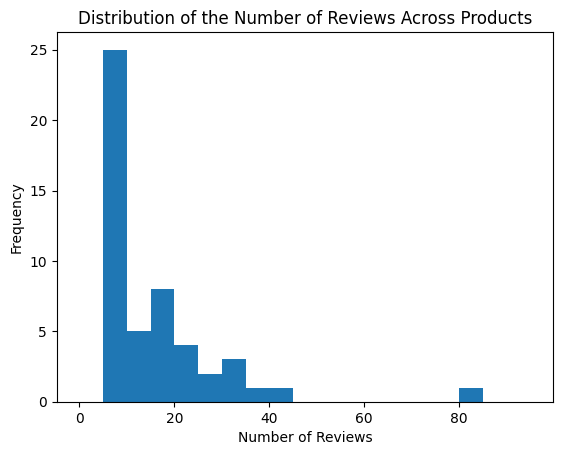

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the distribution using matplotlib.pyplot.hist() function.
plt.hist(counts_of_reviews_per_product[:50], bins=np.arange(0, 100, 5))
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of the Number of Reviews Across Products')
plt.show()

In [16]:
counts_of_reviews_per_product[:10]

asin
0140503528    11
0310432065    15
0310520347    22
0310802636    19
0310806607    16
0310806615     8
0310818605     7
0310818621     9
0310821800    22
0310823706    15
dtype: int64

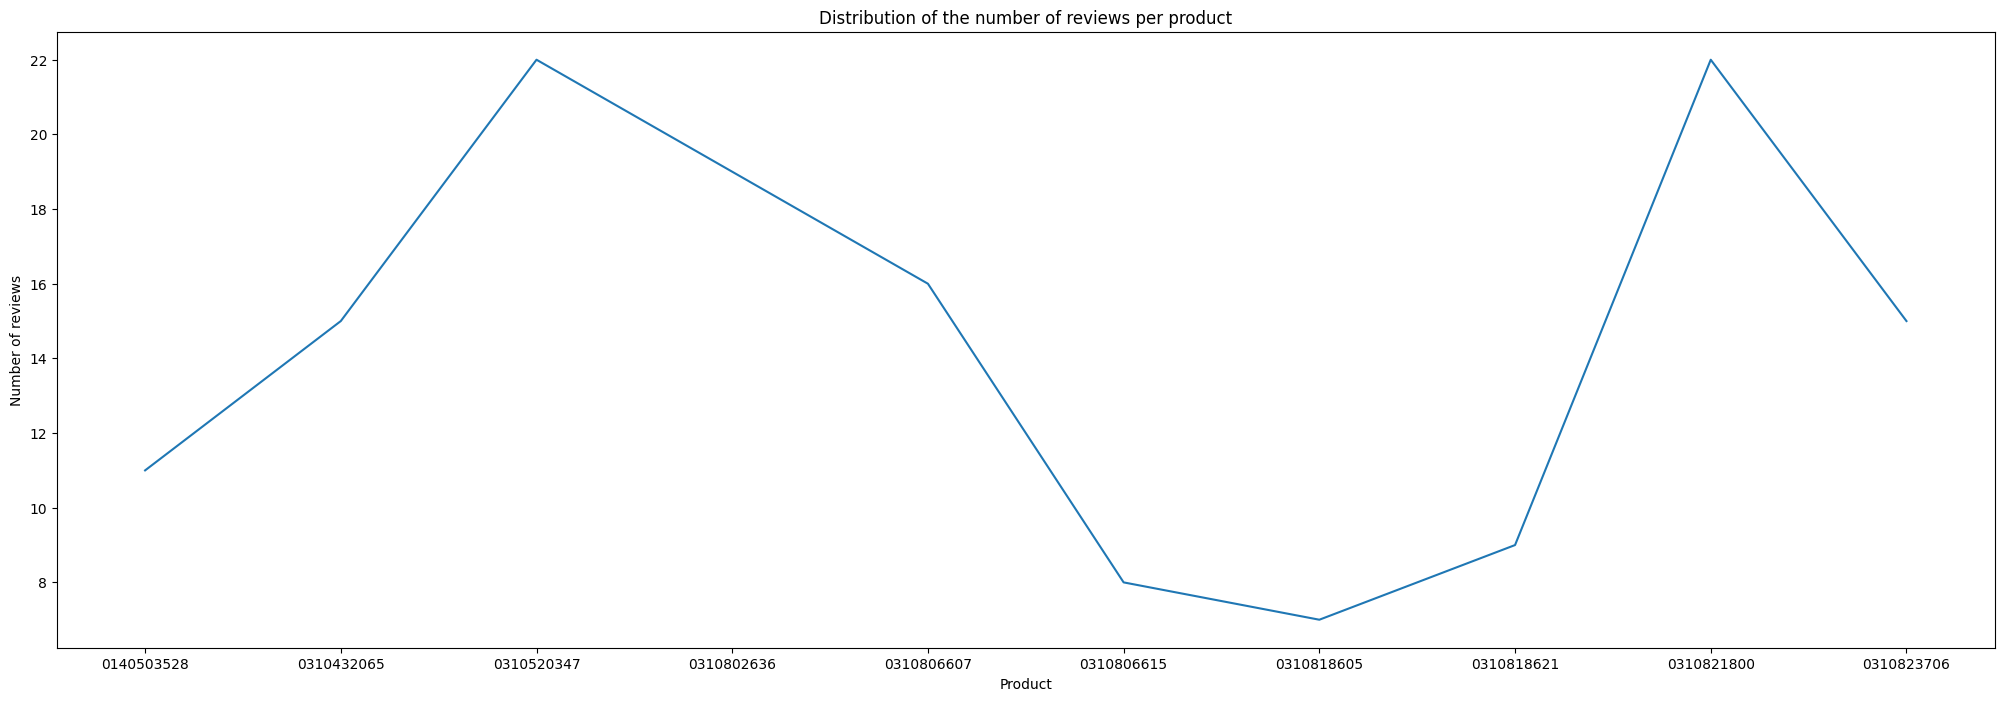

In [17]:
plt.figure(figsize=(25,8))
plt.plot(counts_of_reviews_per_product[:10])
plt.xlabel('Product')
plt.ylabel('Number of reviews')
plt.title('Distribution of the number of reviews per product')
plt.show()

In [18]:
counts_of_reviews_across_products = df.groupby(['asin', 'overall']).size()
# for product, count_of_reviews_per_product in counts_of_reviews_per_product.iteritems():
#   print(f'{product} has {count_of_reviews_per_product} reviews')
counts_of_reviews_across_products[:10]

asin        overall
0140503528  4.0         2
            5.0         9
0310432065  3.0         2
            4.0         2
            5.0        11
0310520347  3.0         1
            4.0         3
            5.0        18
0310802636  3.0         1
            4.0         3
dtype: int64

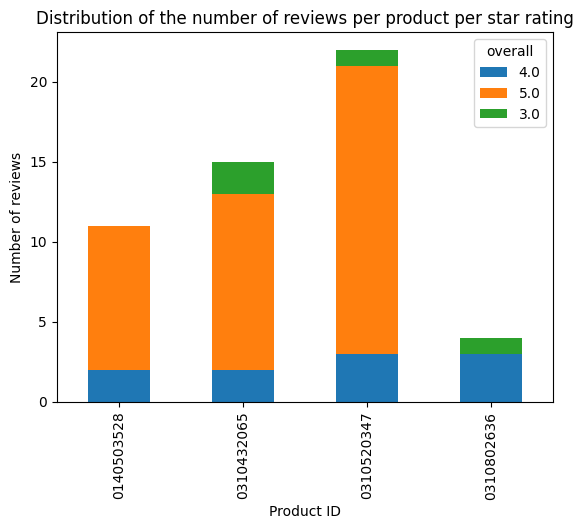

In [19]:
# Unstack the data to create a pivot table with product ids as rows and review ratings as columns
reviews_by_product_and_rating = counts_of_reviews_across_products[:10].unstack()

# Plot the distribution of the number of reviews per product per star rating as a histogram
reviews_by_product_and_rating.plot(kind='bar', stacked=True)
plt.xlabel('Product ID')
plt.ylabel('Number of reviews')
plt.title('Distribution of the number of reviews per product per star rating')
plt.show()

In [20]:
counts_of_reviews_per_user = df.groupby('reviewerID').size()
for user, count_of_review in counts_of_reviews_per_user.iteritems():
  print(f'{user} has {count_of_review} reviews')

C:\Users\vinay\AppData\Local\Temp\ipykernel_2024\4005452610.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for user, count_of_review in counts_of_reviews_per_user.iteritems():


A0001528BGUBOEVR6T5U has 5 reviews
A01003458IEUPS8LQ1QU has 6 reviews
A0203183BAH3TR08FZGB has 7 reviews
A0220159ZRNBTRKLG08H has 5 reviews
A0228801ER3IBSLNOT5W has 10 reviews
A0243759LWJA50LV06FT has 6 reviews
A03492194F0T997EZQ04 has 5 reviews
A0422204VM5KZUEMVY96 has 5 reviews
A0488385844WNV2OWO9X has 7 reviews
A05012776MTIS8L40R3I has 11 reviews
A0526222H977CBZM4DK7 has 6 reviews
A0718466DJ0Y591VLAL7 has 5 reviews
A0718784TOWF9DX1DOFD has 5 reviews
A0759107CA9MPWVRF6VN has 17 reviews
A0981908GQ3RO7WWK6FU has 6 reviews
A1002RB0A8LGMI has 7 reviews
A10032O4VA5EZ6 has 7 reviews
A1004703RC79J9 has 5 reviews
A1004HHMSDY5IP has 12 reviews
A1007NRYNXDJKL has 14 reviews
A1008TVH0VKIA2 has 6 reviews
A1009UWCCRSHY7 has 10 reviews
A100DO844MBA4W has 7 reviews
A100KNMAANCOPE has 5 reviews
A100P59TGEZHR has 6 reviews
A100PBAYYGVJ3X has 6 reviews
A100RH4M1W1DF0 has 6 reviews
A100S1JQ5XK960 has 10 reviews
A100UD67AHFODS has 25 reviews
A100UXMXYOQU1X has 13 reviews
A100V5QEICGPDA has 6 reviews
A10

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



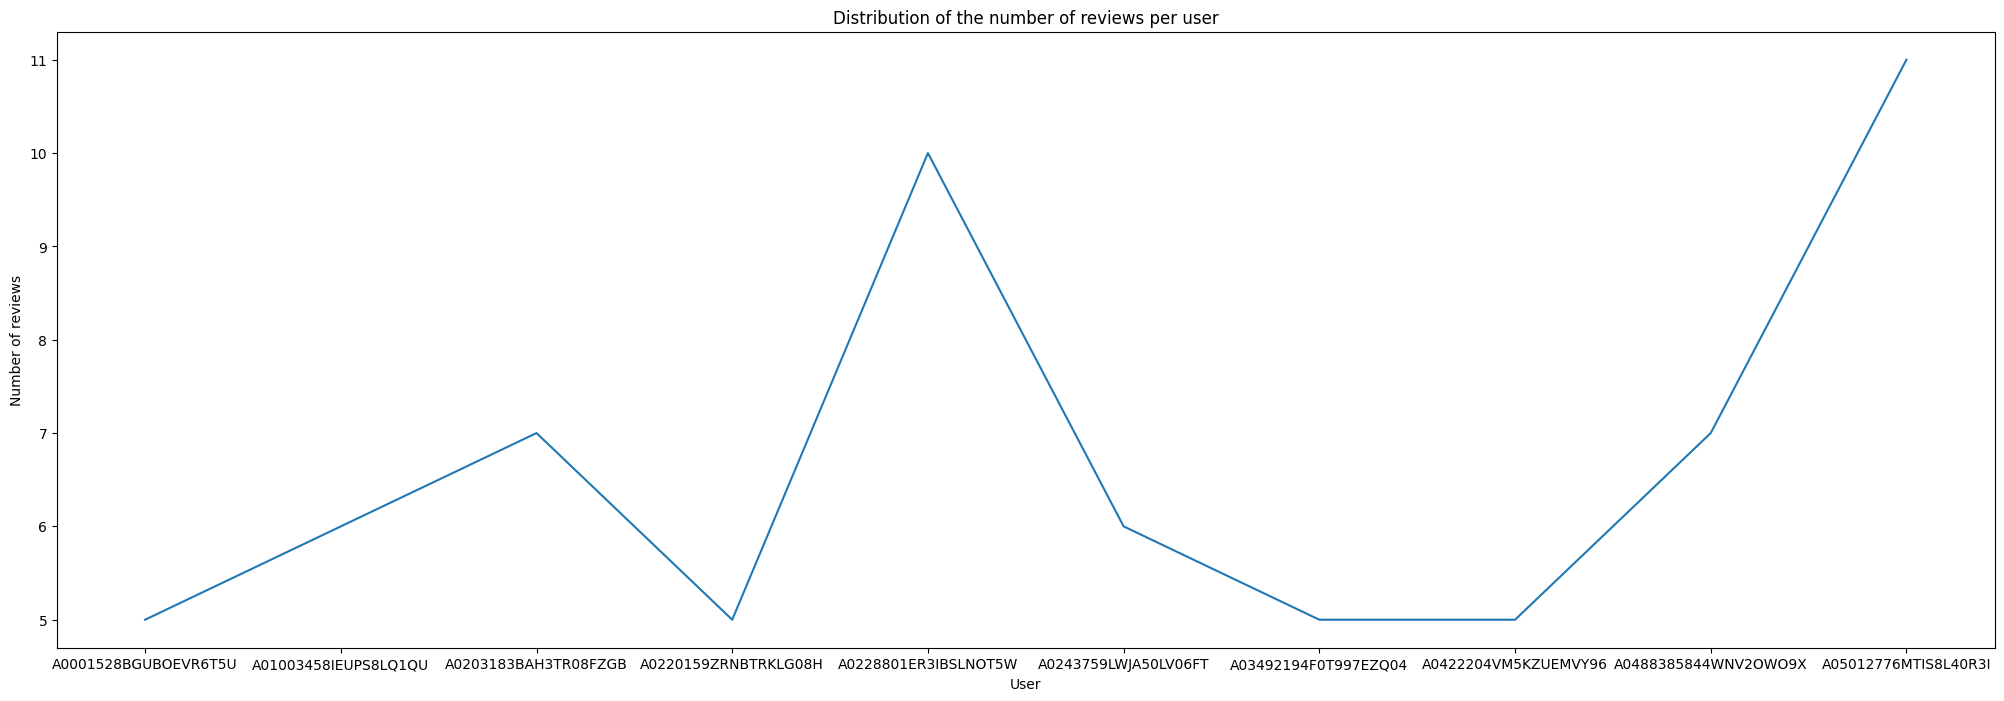

In [21]:
plt.figure(figsize=(25,8))
plt.plot(counts_of_reviews_per_user[:10])
plt.xlabel('User')
plt.ylabel('Number of reviews')
plt.title('Distribution of the number of reviews per user')
plt.show()

In [22]:
positive = df[df['overall'] > 3]
negative = df[df['overall'] < 3]
positive = positive.dropna()
negative = negative.dropna()

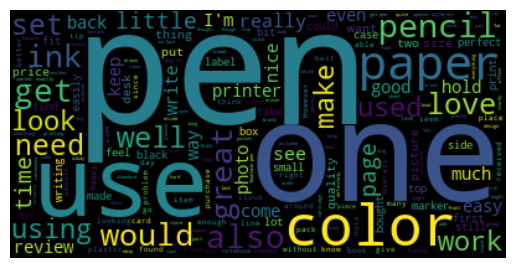

In [25]:
# common words in positive review comments
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

stopwords = set(stopwords.words('english'))
stopwords.update(["br", "stuff", "href","taste", "product", "flavour","like", "coffee", "dog","flavor","buy"]) 

pos = " ".join(review for review in positive.reviewText)
wordcloud = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

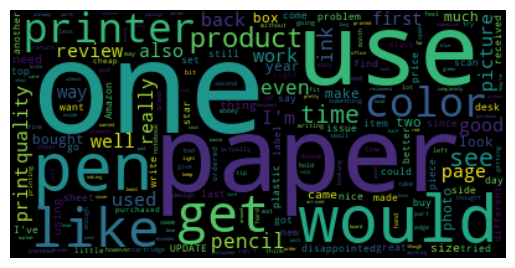

In [26]:
# common words in negative review comments
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = set(stopwords.words('english'))
negreviews = " ".join(review for review in negative.reviewText)
wordcloud = WordCloud(stopwords=stopwords).generate(negreviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
df['reviewText']

0         kids like story BUT while i really wanted a bo...
1         Bought this used and it came in great conditio...
2         Every story and book about Corduroy is Fantast...
3         I purchased this book for my first grade class...
4         Having spent numerous years in an elementary s...
                                ...                        
800352                Delivered on time and is as expected.
800353                                        worked great.
800354    I used to score free UPS 4x6 labels.  The blac...
800355                                                great
800356    Struggled finding a sharpener and they didn't ...
Name: reviewText, Length: 800357, dtype: object

### Pre-processing

In [28]:
import random
n_samples = random.randint(500, 1000)
df_random = df.sample(n=n_samples)

In [29]:
df_random.shape

(878, 12)

In [30]:
df_random

overall  verified   reviewTime      reviewerID        asin  \
465081      4.0      True  01 25, 2015  A1U0CF0V3HH1T3  B0076IHHUU   
361152      5.0      True   11 6, 2016   A4QD50RA02WE0  B0027JIIKQ   
564444      3.0     False  07 27, 2014  A1WH5J3AP5JR7H  B00IHCJY5A   
257190      5.0      True  09 24, 2014   A5I1R4N306W68  B000WFKNH8   
509325      5.0      True  12 16, 2013  A3J2YU2D9BH2J7  B00BR3WXS6   
...         ...       ...          ...             ...         ...   
492597      5.0      True  02 16, 2015   A26LUSDN7WTT6  B00A89YZ6S   
341832      5.0      True  08 21, 2017  A376DCU04I4OAZ  B001MSKZ8G   
387182      4.0      True  12 12, 2015  A1TR1KNR3VKPHY  B003O5K3JQ   
476925      4.0      True   02 9, 2017  A2EBOM1GXGAAE9  B008HPTR9U   
287196      4.0      True  01 11, 2017  A2P71QPSOZ47YE  B0015ASS3U   

                                                    style  \
465081                                                NaN   
361152  {'Package Type:': ' Frustration-Free Packaging...   
564444                                                NaN   
257190                              {'Color:': ' Purple'}   
509325           {'Size:': ' 1 Pack', 'Color:': ' Black'}   
...                                                   ...   
492597                                                NaN   
341832                                                NaN   
387182                                                NaN   
476925                        {'Style:': ' Labeler only'}   
287196                       {'Style Name:': ' 50 Count'}   

                reviewerName  \
465081                 NHMom   
361152           Moshe Weiss   
564444  Dave &amp; Amy Astle   
257190                  bais   
509325           Christopher   
...                      ...   
492597                Melt 2   
341832           baltbelieve   
387182          OkinawanMatt   
476925                 Laura   
287196              E. R. S.   

                                               reviewText  \
465081  Just be aware that these are small rolls, not ...   
361152                               good labeler. thanks   
564444  It's been a long time since I've used an Epson...   
257190  Great product!! The kids haven't broken it yet...   
509325  I have always learned that the third party "co...   
...                                                   ...   
492597                         product and shipping great   
341832  Noodler's ink is the best. Every color is exce...   
387182  I used it to measure the weights of the "Myste...   
476925  This hand held label maker is larger than expe...   
287196  Great pencils.  Not as soft as say Berol Prism...   

                                                  summary  unixReviewTime  \
465081  not as much paper on them that there normally ...      1422144000   
361152                                         Five Stars      1478390400   
564444  and it's disappointing to see that their softw...      1406419200   
257190                                         Five Stars      1411516800   
509325                                GENUINE replacement      1387152000   
...                                                   ...             ...   
492597                                         Five Stars      1424044800   
341832                                         Five Stars      1503273600   
387182  Size of a cell phone, accurate down to decigra...      1449878400   
476925  This hand held label maker is larger than expe...      1486598400   
287196                            Great coloring pencils.      1484092800   

       vote image  
465081  NaN   NaN  
361152  NaN   NaN  
564444  NaN   NaN  
257190  NaN   NaN  
509325   11   NaN  
...     ...   ...  
492597  NaN   NaN  
341832  NaN   NaN  
387182  NaN   NaN  
476925  NaN   NaN  
287196  NaN   NaN  

[878 rows x 12 columns]

In [31]:
def condition(overall):
  # print(df)
  rating = overall
  if rating in (4.0, 5.0):
    return 'Positive'
  elif rating == 3.0:
    return 'Neutral'
  elif rating in (1.0, 2.0):
    return 'Negative'

df_random['label'] = df_random['overall'].apply(condition)

In [32]:
df_random

overall  verified   reviewTime      reviewerID        asin  \
465081      4.0      True  01 25, 2015  A1U0CF0V3HH1T3  B0076IHHUU   
361152      5.0      True   11 6, 2016   A4QD50RA02WE0  B0027JIIKQ   
564444      3.0     False  07 27, 2014  A1WH5J3AP5JR7H  B00IHCJY5A   
257190      5.0      True  09 24, 2014   A5I1R4N306W68  B000WFKNH8   
509325      5.0      True  12 16, 2013  A3J2YU2D9BH2J7  B00BR3WXS6   
...         ...       ...          ...             ...         ...   
492597      5.0      True  02 16, 2015   A26LUSDN7WTT6  B00A89YZ6S   
341832      5.0      True  08 21, 2017  A376DCU04I4OAZ  B001MSKZ8G   
387182      4.0      True  12 12, 2015  A1TR1KNR3VKPHY  B003O5K3JQ   
476925      4.0      True   02 9, 2017  A2EBOM1GXGAAE9  B008HPTR9U   
287196      4.0      True  01 11, 2017  A2P71QPSOZ47YE  B0015ASS3U   

                                                    style  \
465081                                                NaN   
361152  {'Package Type:': ' Frustration-Free Packaging...   
564444                                                NaN   
257190                              {'Color:': ' Purple'}   
509325           {'Size:': ' 1 Pack', 'Color:': ' Black'}   
...                                                   ...   
492597                                                NaN   
341832                                                NaN   
387182                                                NaN   
476925                        {'Style:': ' Labeler only'}   
287196                       {'Style Name:': ' 50 Count'}   

                reviewerName  \
465081                 NHMom   
361152           Moshe Weiss   
564444  Dave &amp; Amy Astle   
257190                  bais   
509325           Christopher   
...                      ...   
492597                Melt 2   
341832           baltbelieve   
387182          OkinawanMatt   
476925                 Laura   
287196              E. R. S.   

                                               reviewText  \
465081  Just be aware that these are small rolls, not ...   
361152                               good labeler. thanks   
564444  It's been a long time since I've used an Epson...   
257190  Great product!! The kids haven't broken it yet...   
509325  I have always learned that the third party "co...   
...                                                   ...   
492597                         product and shipping great   
341832  Noodler's ink is the best. Every color is exce...   
387182  I used it to measure the weights of the "Myste...   
476925  This hand held label maker is larger than expe...   
287196  Great pencils.  Not as soft as say Berol Prism...   

                                                  summary  unixReviewTime  \
465081  not as much paper on them that there normally ...      1422144000   
361152                                         Five Stars      1478390400   
564444  and it's disappointing to see that their softw...      1406419200   
257190                                         Five Stars      1411516800   
509325                                GENUINE replacement      1387152000   
...                                                   ...             ...   
492597                                         Five Stars      1424044800   
341832                                         Five Stars      1503273600   
387182  Size of a cell phone, accurate down to decigra...      1449878400   
476925  This hand held label maker is larger than expe...      1486598400   
287196                            Great coloring pencils.      1484092800   

       vote image     label  
465081  NaN   NaN  Positive  
361152  NaN   NaN  Positive  
564444  NaN   NaN   Neutral  
257190  NaN   NaN  Positive  
509325   11   NaN  Positive  
...     ...   ...       ...  
492597  NaN   NaN  Positive  
341832  NaN   NaN  Positive  
387182  NaN   NaN  Positive  
476925  NaN   NaN  Positive  
287196  NaN   NaN  Positive  

[878 rows x 13 columns]

In [33]:
final_df = pd.DataFrame(df_random['reviewText']) 

In [34]:
type(final_df)

pandas.core.frame.DataFrame

In [35]:
final_df

reviewText
465081  Just be aware that these are small rolls, not ...
361152                               good labeler. thanks
564444  It's been a long time since I've used an Epson...
257190  Great product!! The kids haven't broken it yet...
509325  I have always learned that the third party "co...
...                                                   ...
492597                         product and shipping great
341832  Noodler's ink is the best. Every color is exce...
387182  I used it to measure the weights of the "Myste...
476925  This hand held label maker is larger than expe...
287196  Great pencils.  Not as soft as say Berol Prism...

[878 rows x 1 columns]

In [36]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
nltk.download('punkt')

for _, review in final_df.iterrows():
  sentence = review['reviewText'].lower()
  sentence = sentence.translate(str.maketrans("", "", string.punctuation))

  # Tokenize the sentence into words and remove stop words
  stop_words = set(stopwords.words('english'))
  # Tokenize the sentence into words
  words = [word for word in nltk.word_tokenize(sentence) if word.lower() not in stop_words]

  if words:
    # Create the TF-IDF vectorizer object
    tfidf = TfidfVectorizer()

    # Fit and transform the words using the vectorizer object
    tfidf_matrix = tfidf.fit_transform(words)

    # Print the TF-IDF matrix
    print(tfidf_matrix.toarray())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0.

[[0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.

ValueError: empty vocabulary; perhaps the documents only contain stop words

### Modeling

#### VADR

In [37]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [38]:
# Valence Aware Dictionary and Sentiment Reasoner (VADR)
VADR_analyzer = SentimentIntensityAnalyzer()

predicted_sentiments = []
# Pass the analyzer for head 5 rows
for index, row in df_random.head().iterrows():
    vs = VADR_analyzer.polarity_scores(row["reviewText"])
    print(
        f"Index: {index}\n"+
        f"Sentimental Analysis Result: {vs}\n"+
        f"Overall rating category: {row.label}\n"+
        f"Full Text:\n{row.reviewText}\n"+
        "-"*50)
    if vs['neg'] > vs['pos']:
      sentiment = 'Negative'
    elif vs['pos'] > vs['neg']:
      sentiment= 'Positive'
    else:
      sentiment = 'Neutral'
    predicted_sentiments.append(sentiment)

Index: 465081
Sentimental Analysis Result: {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.6597}
Overall rating category: Positive
Full Text:
Just be aware that these are small rolls, not as much paper on them that there normally would be which is why it seems like a good price.
--------------------------------------------------
Index: 361152
Sentimental Analysis Result: {'neg': 0.0, 'neu': 0.147, 'pos': 0.853, 'compound': 0.7003}
Overall rating category: Positive
Full Text:
good labeler. thanks
--------------------------------------------------
Index: 564444
Sentimental Analysis Result: {'neg': 0.039, 'neu': 0.802, 'pos': 0.159, 'compound': 0.9121}
Overall rating category: Neutral
Full Text:
It's been a long time since I've used an Epson product, and it's disappointing to see that their software experience really hasn't gotten any better - as the other reviews have indicated. The hardware itself is great and it has some great functionality, but they really need to invest in mak

In [39]:
(predicted_sentiments == df_random['label'][:5]).value_counts()

True     4
False    1
Name: label, dtype: int64

### Sentiwordnet

In [43]:
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
from nltk.wsd import lesk

# Download necessary resources
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')

# function to calculate the sentiment score for each word using SentiWordNet
def sw_sentiment_score(word, tag):
    synsets = list(swn.senti_synsets(word, tag))
    if synsets:
        pos_score = synsets[0].pos_score()
        neg_score = synsets[0].neg_score()
        return pos_score - neg_score
    else:
        return 0

# function to calculate the overall sentiment score for each review
def sw_review_sentiment_score(review):
    tokens = word_tokenize(review)
    sentiment_score = 0
    for token in tokens:
        synset = lesk(tokens, token)
        if synset:
            sentiment_score += sw_sentiment_score(synset.lemmas()[0].name(), synset.pos())
    return sentiment_score / len(tokens)

# Classifing each review into positive, negative, or neutral sentiment.
for review in final_df['reviewText']:
    sentiment_score = sw_review_sentiment_score(review)
    if sentiment_score > 0:
        print('\nPositive Review:', review)
    elif sentiment_score < 0:
        print('\nNegative Review:', review)
    else:
        print('\nNeutral Review:', review)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!



Positive Review: Just be aware that these are small rolls, not as much paper on them that there normally would be which is why it seems like a good price.

Positive Review: good labeler. thanks

Negative Review: It's been a long time since I've used an Epson product, and it's disappointing to see that their software experience really hasn't gotten any better - as the other reviews have indicated. The hardware itself is great and it has some great functionality, but they really need to invest in making the user experience better. You should not dread having to scan some documents, which is the situation I find myself in when using this scanner. I'd recommend checking out a comparable Fujitsu model instead.

Positive Review: Great product!! The kids haven't broken it yet and we've had it for almost 6 months.

Negative Review: I have always learned that the third party "compatible" are a disaster waiting to happen. Do not trust those. Use a genuine replacement. If your machine is used mo


Positive Review: I bought these for my sons' school desks.  They are perfect for pencils, glue, erasers and a treasure or two :D  They really made the desks look so nice! I found this same product at Fred Meyer's for $18 so I was really happy with Amazon's $10 price!

Positive Review: Don't waste your money on these.  They look alright, they feel alright, they write okay but not great even with top notch Noodlers ink.  The nibs are quick thick and will drip or catch on toothy paper.  The converters are cheaply made and often leak within the barrel.

Save your money and pick up a Lamy Safari.

Neutral Review: 'Nuff said.

Negative Review: Really Cool label Maker! Just make sure you buy some label maker tape because you'll run out fast!

Neutral Review: Great Product

Negative Review: Evidently there's been a price drop since I purchased less than 2 wks ago.
I paid 12.28; as of this writing 9.38--even better deal!
The cartridges are a bit smaller than authentic Brother.  But fit into my


Positive Review: Mead Organizher My Week Canvas Planner July 2016 - June 2017 in a Floral Design is a competent weekly planner. It comes with a dated weekly set-up put together in a zippered canvas tote. This is great for storing in your purse.

It is 5 1/2 x 8 1/2 size so its small enough for comfort fitting, but big enough so you aren't squinting to see what you wrote.

The fact that its 6 months in and I was offered this for review is kind of silly, I won't be using it much, since I already have my calendar set up. So, Im just giving you the run down of how it looks and works. I wish there were lines, instead of scribble areas which are blank boxes.

Overall, its a nice weekly planner, the zippered pouch gives it a bit of extra, but I don't know if I would go for this if I had a choice. I would prefer a harder, laminated planner. But, the fact you can zip it up and store extras in it, as like a wallet, makes it a plus. I could see storing coupons, or tickets in here.

Overall a goo


Neutral Review: I love this I had to get another lamintaor because the other one was over heating that was not good love the jam release switch

Positive Review: These Note Cards are very cheerful. Plus I like the size, folded 6"x4.5" - blank inside, can be used for many purposes.

Negative Review: I little pricey for a calendar. Other than that it is good

Negative Review: Do not understand the pet moustache thing, but I guess it works for some people. The right under your nose is cute, though.

Positive Review: This bed/couch table is very handy. I use it for my laptop, and I plan to use it for other purposes since it's a versatile surface. The little drawer is handy. The product is made well. It's a bit cumbersome but would have to be for all the space it provides.

Negative Review: l like it.

Positive Review: Hard to find, nice and thin.

Neutral Review: great

Positive Review: I haven't actually given these out to anyone yet (stocking stuffers) but I love the feel of these. I pu


Negative Review: The gold leafing pen delivers the color as promised, but sometimes I get a bit frustrated because the tip can get a bit frayed and does not hold its shape as well as I hoped. However, it is a very good product, and when the tip frays a bit I just pool the ink out of the pen onto a piece of paper and use a pen to apply the ink on my project.

Negative Review: The picture shows files standing on their own. It also shows a white piece on the far side as opposed to the translucent wire it's made of.

My files do not stand on their own. They fall over regular. So I threw in a few books to keep things in order. The white piece on the side does not exist.

I purchased this to store my kids printouts and worksheets. I was hoping for a quick grab and go solution. I guess this works. It looks like a hot mess on our counter though.

Positive Review: I'm finally getting around to framing to hang some family photos. A co-worker recommended this product to adhere the picture to the


Positive Review: Enough room for my keyboard under, and some little things on top of the shelf. I love the cup holder. The phone holder isn't really practical to use for a phone, but you can set things on it (including a cup / water bottle).

The USB ports work perfectly well and I use them for all of my camera uploads and kindle book library downloads.

Neutral Review: Fast shipping, Pens are great

Positive Review: Very pleased with this incredibly powerful stapler! It can manage a large number of pages quickly and efficiently. It is consistent, reliable, and doesn't take up a lot of room on the desk. I would purchase this again without a second thought!

Positive Review: Works great! Best for small to medium packages, you can still fit a  large on here fairly easily but you have to balance it!

Positive Review: It fits perfect and you can position it in many different ways. The screws kit had all the necessary size I needed.

Positive Review: These were high quality dividers. There


Positive Review: WHY or why have I not purchased these before. It was either $70 for four of HP or 10 of these. Print is excellent and it's nice seeing that the cartridges are FULL of ink. I have always wondered about the HP inks. The plastic cover is SO MUCH easier to remove. Now I no longer want to purchase another brand printer to save on ink. So happy I made this purchase.

Positive Review: just what I wanted, arrived no problems.

Positive Review: I bought these for my classroom. Im quite impressed! They work just as promised and the quality is good for the price

Positive Review: The zebra pens are extremely good for the money...i now have quite a few and my wife uses them at work... nice!

Positive Review: fit the Bible I was looking for a cover for.  was exactly as described, arrived when expected

Positive Review: I've been a cordless phone fan since the days of sub-50 mhz frequencies, and I've been using 2.4 Ghz phones around the house now for more than 2 years. They were re


Neutral Review: I use these pens almost daily, we do a lot of client communication and like to jazz it up a bit with the bright colors.  My only issue with them is that they smudge a bit on glossy paper, so I just make sure that the inside of my note cards is matte.  Otherwise, these are great!

Positive Review: daughter needed them for schoo.

Positive Review: loved it

Neutral Review: Ok

Neutral Review: Why pay more than you have to?

Negative Review: I like these pens for writing on calendars, grocery lists, checkbook registers, household account ledgers, gift cards etc. They are available in other colors too and you can "erase" them if you make a mistake. I do not use them however for addressing cards or writing checks.

Positive Review: Comfort, performance, quality - what more could you ask of a wtriting instrument? I tend to like the 0.5mm tips and this delivers a smooth flow of ink. If I love it, you just might love it too!

Positive Review: Smoothest writing pen in the unive


Negative Review: These are really great pens for the price.  I like that they use fountain pen ink.  Use the everyday and have ordered additional pens.  Cost of the cartridges is a little high.

Negative Review: Great post-it Super Sticky notes and was shipped
fast to I likes that.

Positive Review: This is good to use when  flipping paper

Neutral Review: Makes my gavel special.

Negative Review: Not enough selection.

Positive Review: Fantastic quality and price.

Positive Review: We bought several different colors of JAM paper labels for moving boxes, to label different rooms. They wouldn't stay adhered to the cardboard!  We had to literally tape them down with clear moving tape.  We might as well have used pieces of colored construction paper at a tiny fraction of the price.  Pretty worthless as stickers.

Positive Review: I love these.

Positive Review: I bought these thinking they were a fine tips pen but I realize I didn't read the info as close as I should have. I did try one 


Negative Review: I bought this as a gift from a friend who only later told me that it was not actually big enough for her large expanded Bible.  This bible Organizer is supposed to fit large Bibles,.  I suppose the term is relative.

Positive Review: I'm sure i didn't read carefully enough.  these are nice but they all have a little glittery effect which i didn't care for. they came intact and quickly so i won't complain

Positive Review: Great quality chair. Love that it encourages good posture all the time and the mesh is a highly welcomed change; loving the airflow.

Neutral Review: great!

Positive Review: Just installed but seems OK so far.

Positive Review: I got this for my wife as a present. The tree imprint is really beautiful, and she loves it. The leather is rather thin and cheap feeling - I didn't expect *that much* for a 30$ journal, but I was still slightly surprised. She's had it for about 6 months now and it's in great condition though. The board backing on the covers 


Positive Review: Many individuals who use pencils in their profession and personal endeavors will spend $30-$50 on Eberhard Faber Blacking 602 pencils. While those are excellent pencils, the Japanese companies (Mitsu-Bishi and Tomboy) produce pencils that equal or exceed the Blackwing 602. My two favorite Japanese produced pencils are the Mitsu-Bishi Uni Hi-Uni "B" and "2B" and the Tombow MONO "B" and "HB" and MONO100 "B" and "HB." I doubt one will find "better quality" quality pencils than these Japanese products. The are dark, smooth, visually appealing, and very well finished.

Positive Review: This product is great to fit into my current printer which works fine, and I'd like to see a twin-cartridge package of this brand or perhaps a triple-bonus. It does great when printing - thank you!

Positive Review: The light/medium brown I was looking for. I've bought these brown microns before and this one is no different from the quality fine tipped pens I have come to love.

Positive Rev


Negative Review: The Good Part
Arrived promptly and well packaged. Seems quieter than expected from reviews.

The Bad Part
Initial setup instructions not clearly labeled a bit too succinct; I could have used clearer directives and better labeling; had to presume a bit more than comfortable, though apparently guessed correctly.

Software setup lackedg sufficient step identifiers to ascertain where one was in the setup routine; there was never an indication that it was completed. Lacking photographic memory of previous screens, I eventually simply abandoned the seemingly redundant, cyclical routine and checked my printer options, fortunately I found the printer available, and it printed. So far so good.

HP really should have tested the setup and provided clear indicators of the steps and completion thereof.

Inexcusable. The URL provided for online access to setup without a CD drive was a dead end and required searching for the setup procedure on the HP web site. Not difficult to find,


Positive Review: I have quite a few of these Iris storage containers in my home. I've purchased them at various big-box retailers, at different times over the past few years, and there are at least four variations that I'm aware of (and I have a few of each). Each of these storage boxes will hold the same amount of files or other papers, and they are both stackable and more or less interchangeable, but there are differences in how they are made:

- FB-21 model: 13 7/8" W x 18 1/4" L x 10 3/4 " H. The top lip of these containers is smooth on all sides and there is no handle molded into the lip (I don't find these on Amazon at the moment)
-&nbsp;<a data-hook="product-link-linked" class="a-link-normal" href="/FB-21E-model/dp/B008DM1YR0/ref=cm_cr_arp_d_rvw_txt?ie=UTF8">FB-21E model</a>&nbsp;or&nbsp;<a data-hook="product-link-linked" class="a-link-normal" href="/FB-21E-model/dp/B00FXRN4IU/ref=cm_cr_arp_d_rvw_txt?ie=UTF8">FB-21E model</a>: 14 1/4" W x 18 1/16 L x 10 13/16" H. The top lip of


Positive Review: These are not DYMO Lables, though I don't know if that makes a difference. I recently purchased the DYMO LableWriter 450 Twin Turbo and have never used DYMO brand labels with the printer so I have no reference point. But the labels appear to print okay, they stick to what they are stuck to, so therefore the labels appear to work as designed. Four stars just because I don't have extended experience with these or DYO labels, and don't know if there are any long term issues with surface adhesion.

Positive Review: Despite the pink, glitter and shine, this is a card with attitude. The saying is snarky and sure to get a laugh. It is definitely designed for a warrior princess (think Xena or Merida as opposed to Cinderella or Belle). It comes with justWink's unique side opening  envelope. A fun Card for the Right person.

Positive Review: I loved the printer when I first got it.  It printed beautifully, but once the ink cartridges were replaced with genuine EPSON ink cartrid


Negative Review: White Ink on Clear adhesive back material is a label that I thought I would never see. Yet, in the automotive industry, wher so many knobs, fascias, and controlls are black, these labels ( Of anything that you can print on a computer, are amazingly versatile!

Positive Review: Color is slightly different in person, more muted/grey-tone and the card slots tear easily but it works!

Positive Review: ordered two, one was damaged upon delivery, nice and sturdy.

Positive Review: I like the size and the way it is organized. Use one every year. Good Value at a very good price.

Positive Review: The ink is awesome.  The pen that came with it had a weird, mismatched cap and doesn't work well, but should, according to reviews.  Contacted seller...zero response.  That is disappointing.  But, Noodler's Ink is amazing.  I have a ton of colors, and love them all.

Positive Review: this is just what I wanted

Neutral Review: Sometimes you just need to tape stuff together.  This doe


Positive Review: I love this- it's actually 2 parts.  The first is the cart itself, which will fold down to about 2" tall for storage.
The second part is the canvas overlay that has the pockets and color.  It's pretty big and even when folded very compactly, takes up about the space of 2 fluffy beach towels.

Putting it together is fairly simple, and there's no tools required.  It comes in a box, and first you just pop the box up, which reminds me a bit of a souped up milk crate, lock the bottom down, and there's 2 pieces that you have to put on the tops of the sides that lock those into place.  The cart itself is pretty light.

The canvas bag goes on next, and I found it best just to look at the pictures here on Amazon to get it oriented right, and then it was easy- it just slides on.  The canvas makes it attractive and gives it a TON more space.  There's pockets on every side, some that zip.  It's wide enough for the largest textbooks.  It is well designed for lots of markers, penci


Positive Review: These Bible Tabs are great. I love that they have plenty extras to practice or to index any additional books/appendix in the Bible. The tabs are small but easy to read. Great product!

Neutral Review: So cheap, compare with the original one. Works just like the branded one.

Negative Review: Works very well, and the large size allows more freedom of movement.

Positive Review: No wired network interface but the wireless works well. Decent color on presentations and photos, and the scan and fax functions work as expected.

Negative Review: I used these to organize my recipe collection.  They are easy to use, sturdy, and do just the trick.  Nothing not to like about them.

Positive Review: useful and good

Positive Review: Post-it are it! I love the organization that they bring for me. They don't leave sticky stuff when you take it off.

Positive Review: I deal with a lot of paperwork and these rubber fingers really make flipping through paper easy!

Negative Review: It


Negative Review: This would seem at first glance to be a perfect sharpener- all metal and with ''tip saver technology to prevent over sharpening'.  The reality doesn't quite live up to the promise in the advertising.  Often only one side of the pencil is actually shaved after insertion...so you have a  point....but its half lead while the other side of the point is still completely covered in wood.  This seems to happen because one set of blades is not sharpened or aligned the same amount as the blades on the other side, so you get an uneven cut- or often none at all on one side.

Another problem in the design is that in actual practice there is nothing to stop you from sharpening an entire pencil down to a nub in a futile effort to get a clear point on the tip that isn't obstructed on one side by wood.  In other words- if you do finally get a 'normal' sharp point you will probably find you have had to grind away half of a new pencil to do it.

And if you're wondering before purchase.

#### TextBlob

In [45]:
from textblob import TextBlob

In [46]:
list(final_df['reviewText'])

['Just be aware that these are small rolls, not as much paper on them that there normally would be which is why it seems like a good price.',
 'good labeler. thanks',
 "It's been a long time since I've used an Epson product, and it's disappointing to see that their software experience really hasn't gotten any better - as the other reviews have indicated. The hardware itself is great and it has some great functionality, but they really need to invest in making the user experience better. You should not dread having to scan some documents, which is the situation I find myself in when using this scanner. I'd recommend checking out a comparable Fujitsu model instead.",
 "Great product!! The kids haven't broken it yet and we've had it for almost 6 months.",
 'I have always learned that the third party "compatible" are a disaster waiting to happen. Do not trust those. Use a genuine replacement. If your machine is used mostly in a business setting this is exactly what you need: extra black to

### Validation

In [47]:
predicted_sentiments = []
for text in list(final_df['reviewText']):
  if isinstance(text, str):
    wiki = TextBlob(text)
    predicted_sentiments.append(wiki.sentiment)

In [48]:
predicted_ratings = []
for predicted_sentiment in predicted_sentiments:
  if predicted_sentiment.polarity == 0:
    predicted_ratings.append('Neutral')
  elif predicted_sentiment.polarity < 0 :
    predicted_ratings.append('Negative')
  elif predicted_sentiment.polarity > 0 :
    predicted_ratings.append('Positive')

In [49]:
(predicted_ratings == df_random['label']).value_counts()

True     695
False    183
Name: label, dtype: int64